# lab 1
From: https://github.com/atikagondal/Lab-2023-DAVE3625/tree/main/Lab1


In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#task 1 Reads inn the CSV file

datafile = pd.read_csv("https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/Lab1/stud.csv", sep=',')
datafile.info()
datafile.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   50 non-null     int64  
 1   Age         50 non-null     object 
 2   email       50 non-null     object 
 3   hrsStudy    50 non-null     object 
 4   FinalGrade  49 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


,StudentID,Age,email,hrsStudy,FinalGrade
0,47412,20,s47412@oslomet.no,5,46.0
1,15077,22,s15077@oslomet.no,0,65.0
2,15467,27,s15467@oslomet.no,1,26.0
3,17907,21,s17907@oslomet.no,6,68.0
4,13352,333,s13352@oslomet.no,4,34.0


In [19]:
regexp = r'^\s*$'

#task 2 replaces all the empty data with NaN
datafile = datafile.replace(regexp, np.nan, regex=True)
datafile['Age']=datafile['Age'].fillna(0).astype('int32')
datafile['email']=datafile['email']
datafile['hrsStudy']=datafile['hrsStudy'].fillna(0).astype('int32')
datafile['FinalGrade']=datafile['FinalGrade'].fillna(0).astype(float)
datafile.info()
#datafile.dtype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   50 non-null     int64  
 1   Age         50 non-null     int32  
 2   email       50 non-null     object 
 3   hrsStudy    50 non-null     int32  
 4   FinalGrade  50 non-null     float64
 5   grade       50 non-null     object 
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 2.1+ KB


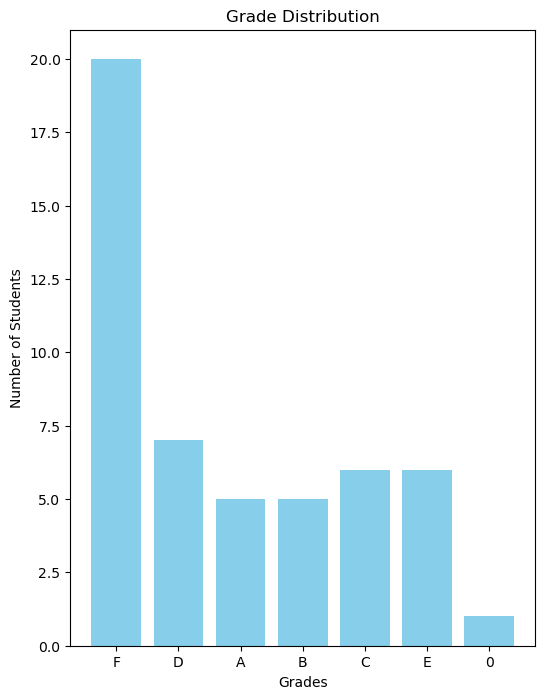

In [18]:
#Task 3
# 91 - 100 = A 81 - 90 = B 71 - 80 = C 61 – 70 = D 51 – 60 = E > 50 = F

#conditions for the grades
conditions = [
(datafile['FinalGrade'] <= 100) & (datafile['FinalGrade'] >= 91), 
(datafile['FinalGrade'] <= 90) & (datafile['FinalGrade'] >= 81), 
(datafile['FinalGrade'] <= 80) & (datafile['FinalGrade'] >= 71),
(datafile['FinalGrade'] <= 70) & (datafile['FinalGrade'] >= 61), 
(datafile['FinalGrade'] <= 60) & (datafile['FinalGrade'] >= 51), 
(datafile['FinalGrade'] <= 50)
]                                                                                                                                                        
#the grades
val = ['A','B','C','D','E','F']
#to add the grade colum
datafile['grade'] = np.select(conditions, val)

#finds gives the grades
#grades = np.select(conditions, val)
#creating the plot
grade_counts = datafile['grade'].value_counts().reindex(grades, fill_value=0)
plt.figure(figsize=(6, 8))
plt.bar(grade_counts.index, grade_counts.values, color='skyblue')
plt.xlabel('Grades')
plt.ylabel('Number of Students')
plt.title('Grade Distribution')
plt.show()